# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

dir = 'traffic-signs/'

training_file = dir + 'train.p'
validation_file= dir + 'valid.p'
testing_file = dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[np.random.randint(n_train)].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

C:\Users\Mike\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import random
# helper function for displaying images
def plots(ims,rows=1,figsize=(12,6)): 
    if ims == None:
        return      
    f = plt.figure(figsize=figsize)
    cmap = 'gray' if len(ims[0].shape) == 2 else None
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        plt.imshow(ims[i], cmap=cmap)
        plt.tight_layout()
        plt.grid(False)
        plt.axis('off')
    plt.show()

def get_names():
    return pd.read_csv('signnames.csv').values
        
def create_dict():
    return dict(zip([i for i in range(43)], [1 for i in range(43)]))
    
def get_label(x, y, label, num):
    collection = []
    x, y = shuffle(x, y)
    complete = 0
    for i in range(len(x)):
        if y[i] == label:
            collection.append(x[i])
            complete += 1
            if complete >= num:
                return collection
    
def gen_imgs(x,y,num):
    d_imgs = create_dict()
    
    for label in range(43):
        d_imgs[label] = get_label(x, y, label, num)
    
    return d_imgs
            

0. Speed limit (20km/h)


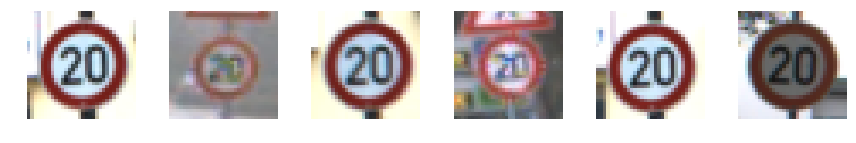

1. Speed limit (30km/h)


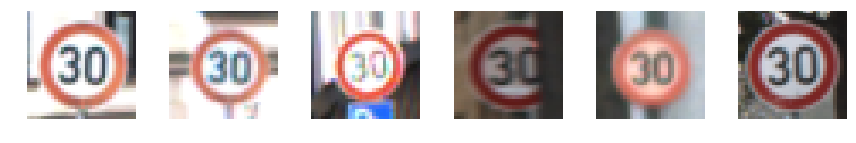

2. Speed limit (50km/h)


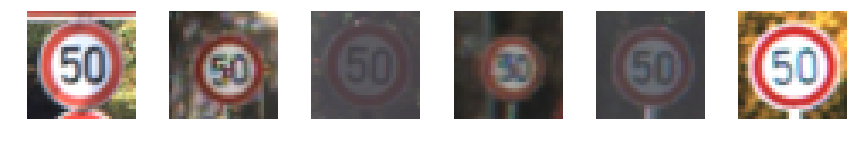

3. Speed limit (60km/h)


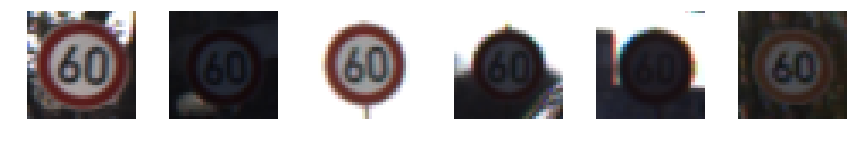

4. Speed limit (70km/h)


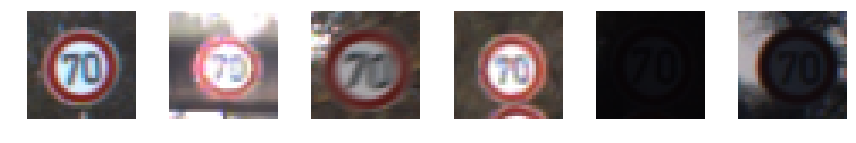

5. Speed limit (80km/h)


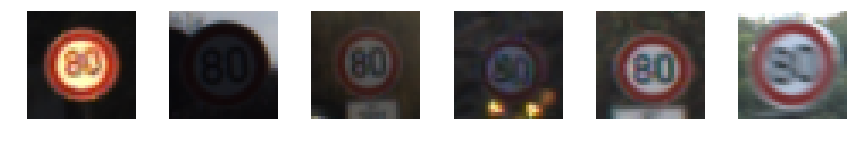

6. End of speed limit (80km/h)


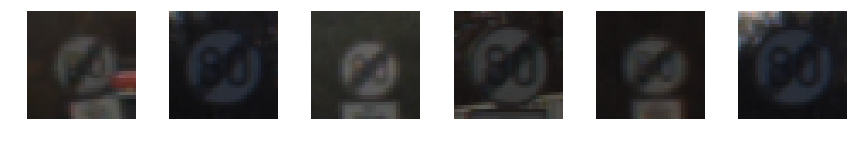

7. Speed limit (100km/h)


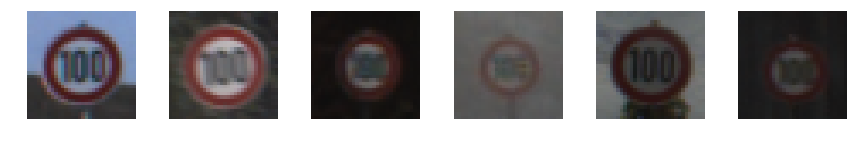

8. Speed limit (120km/h)


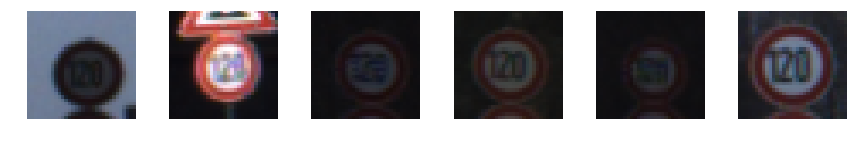

9. No passing


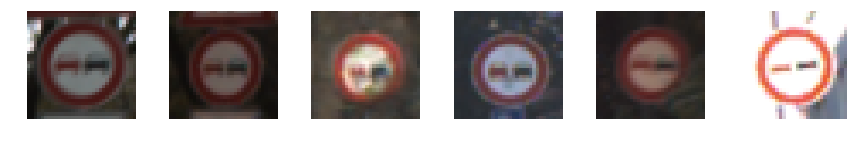

10. No passing for vehicles over 3.5 metric tons


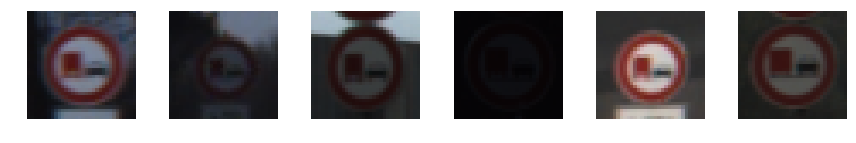

11. Right-of-way at the next intersection


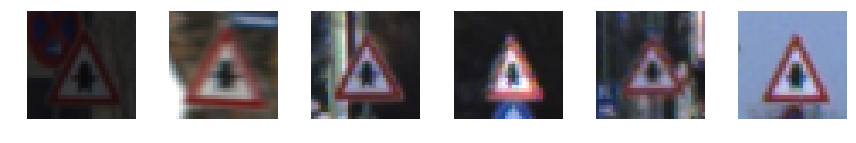

12. Priority road


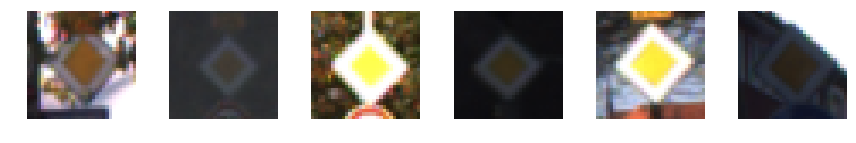

13. Yield


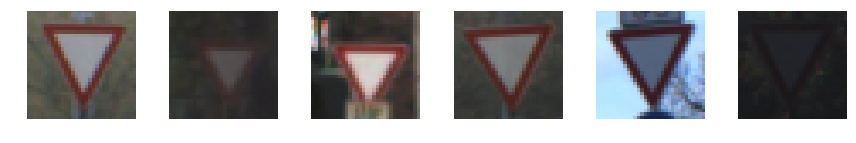

14. Stop


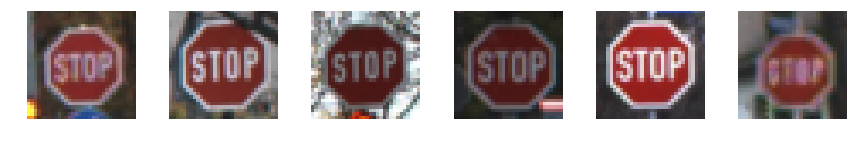

15. No vehicles


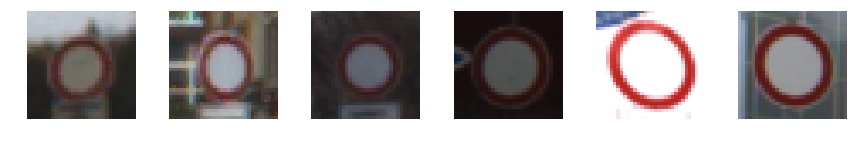

16. Vehicles over 3.5 metric tons prohibited


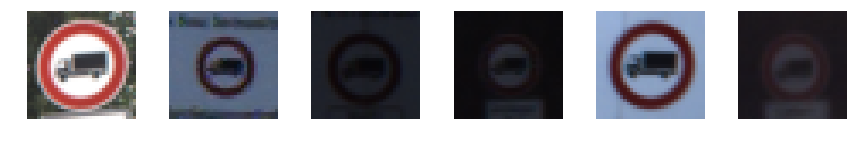

17. No entry


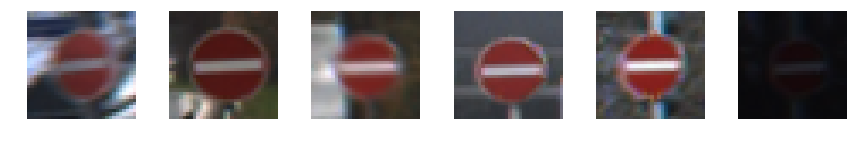

18. General caution


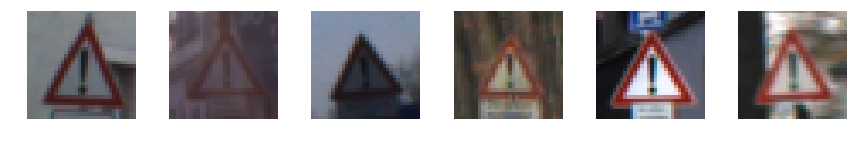

19. Dangerous curve to the left


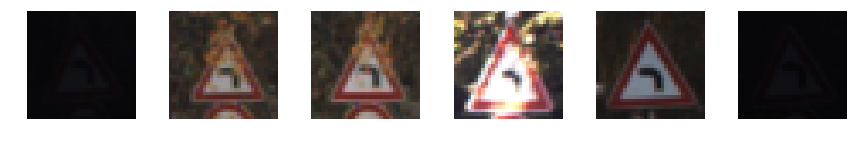

20. Dangerous curve to the right


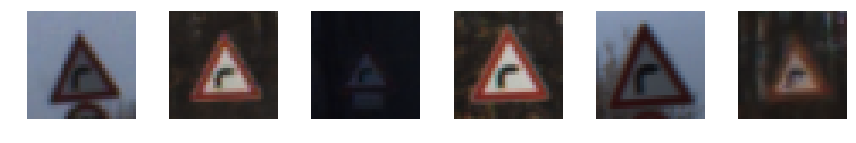

21. Double curve


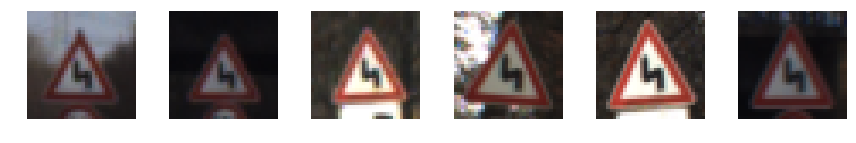

22. Bumpy road


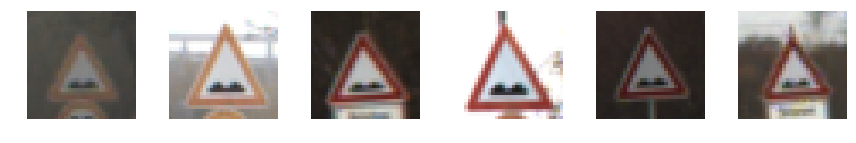

23. Slippery road


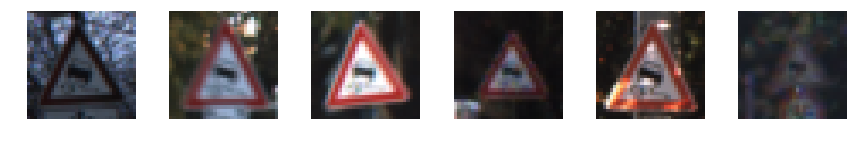

24. Road narrows on the right


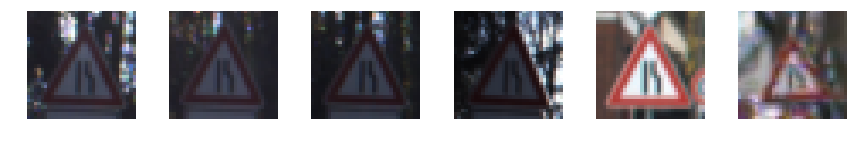

25. Road work


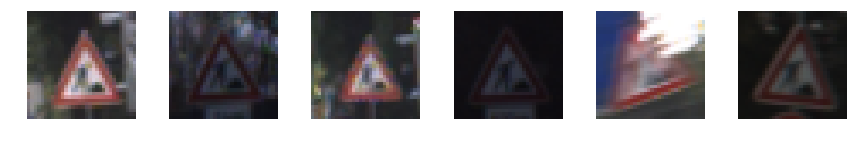

26. Traffic signals


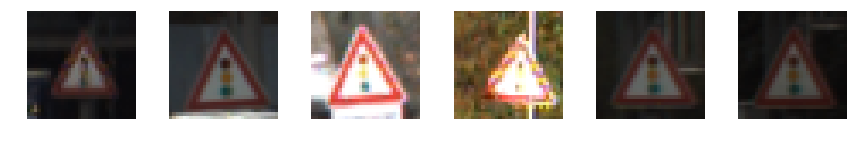

27. Pedestrians


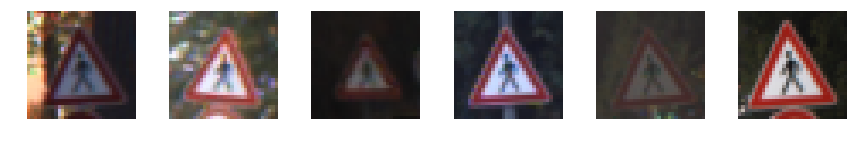

28. Children crossing


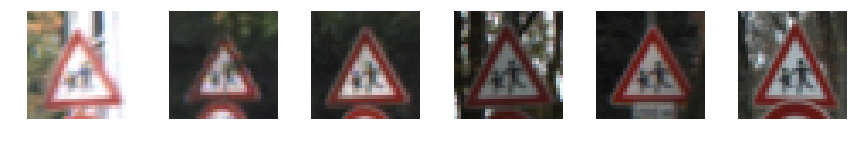

29. Bicycles crossing


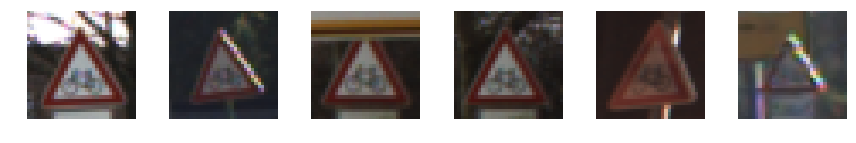

30. Beware of ice/snow


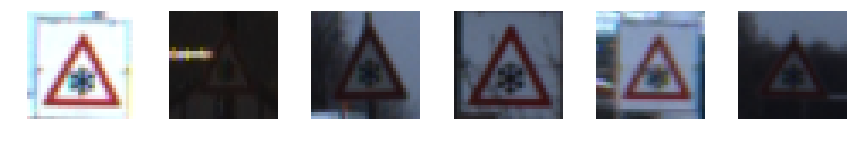

31. Wild animals crossing


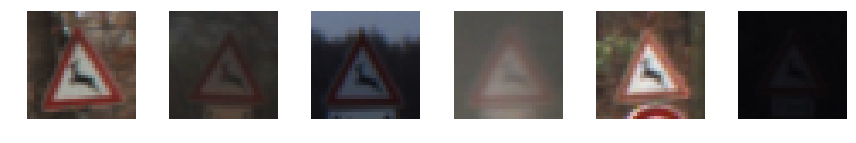

32. End of all speed and passing limits


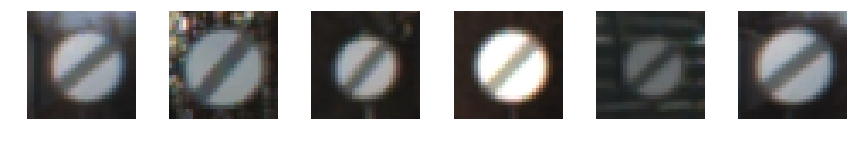

33. Turn right ahead


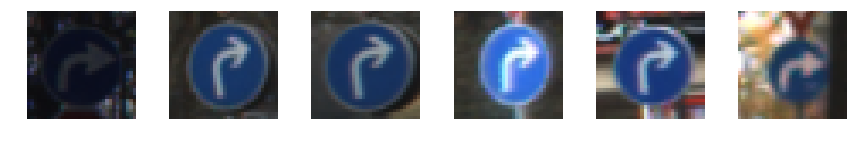

34. Turn left ahead


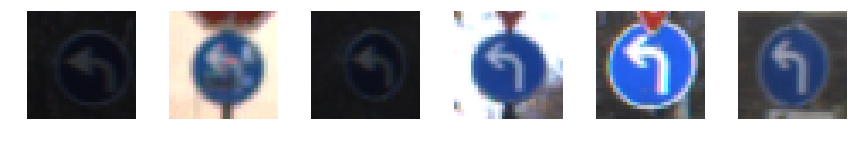

35. Ahead only


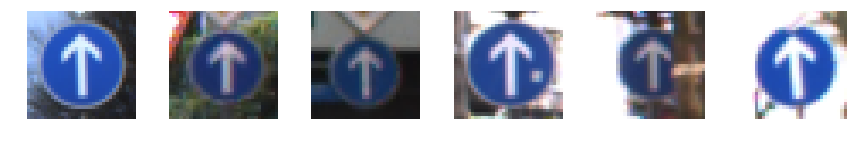

36. Go straight or right


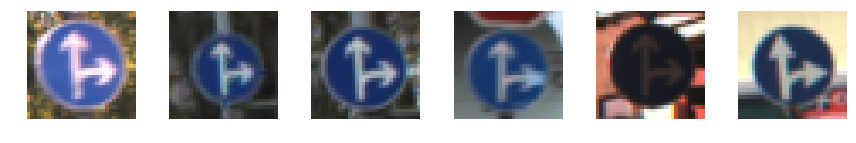

37. Go straight or left


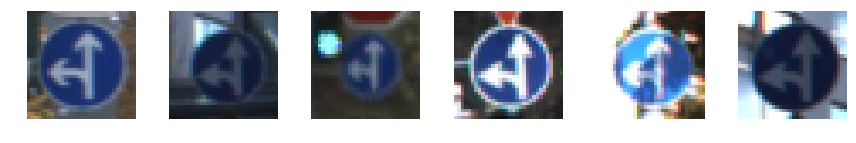

38. Keep right


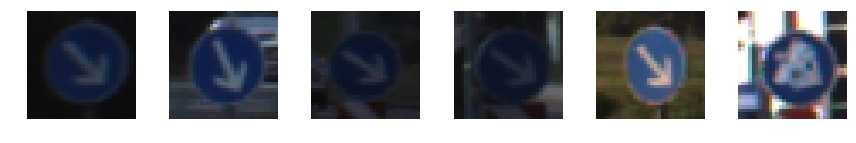

39. Keep left


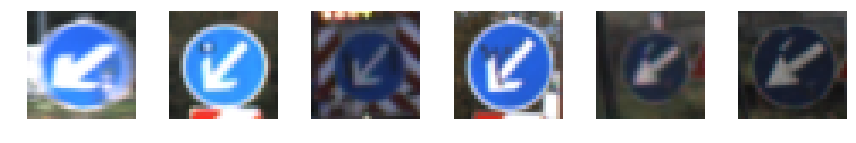

40. Roundabout mandatory


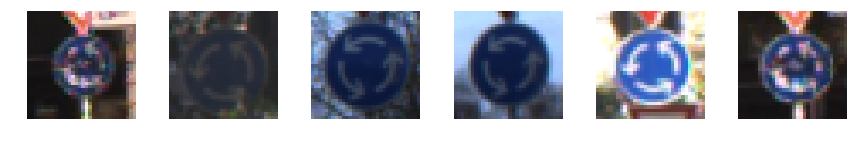

41. End of no passing


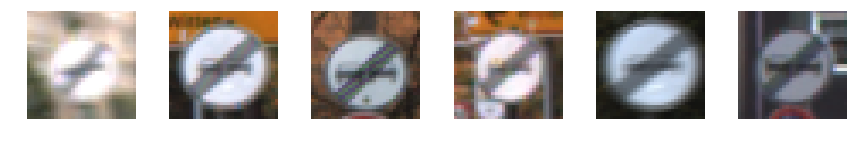

42. End of no passing by vehicles over 3.5 metric tons


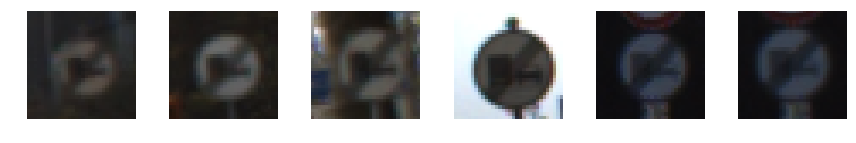

In [6]:
# look at images from data
def plot_data(x, y, num):
    d = gen_imgs(x, y, num)
    signs = get_names()
    for label in d.keys():
        print('{}. {}'.format(signs[label][0], signs[label][1]))
        plots(d[label], rows=1)
    # free memories 
    del d

plot_data(X_train, y_train, 6)

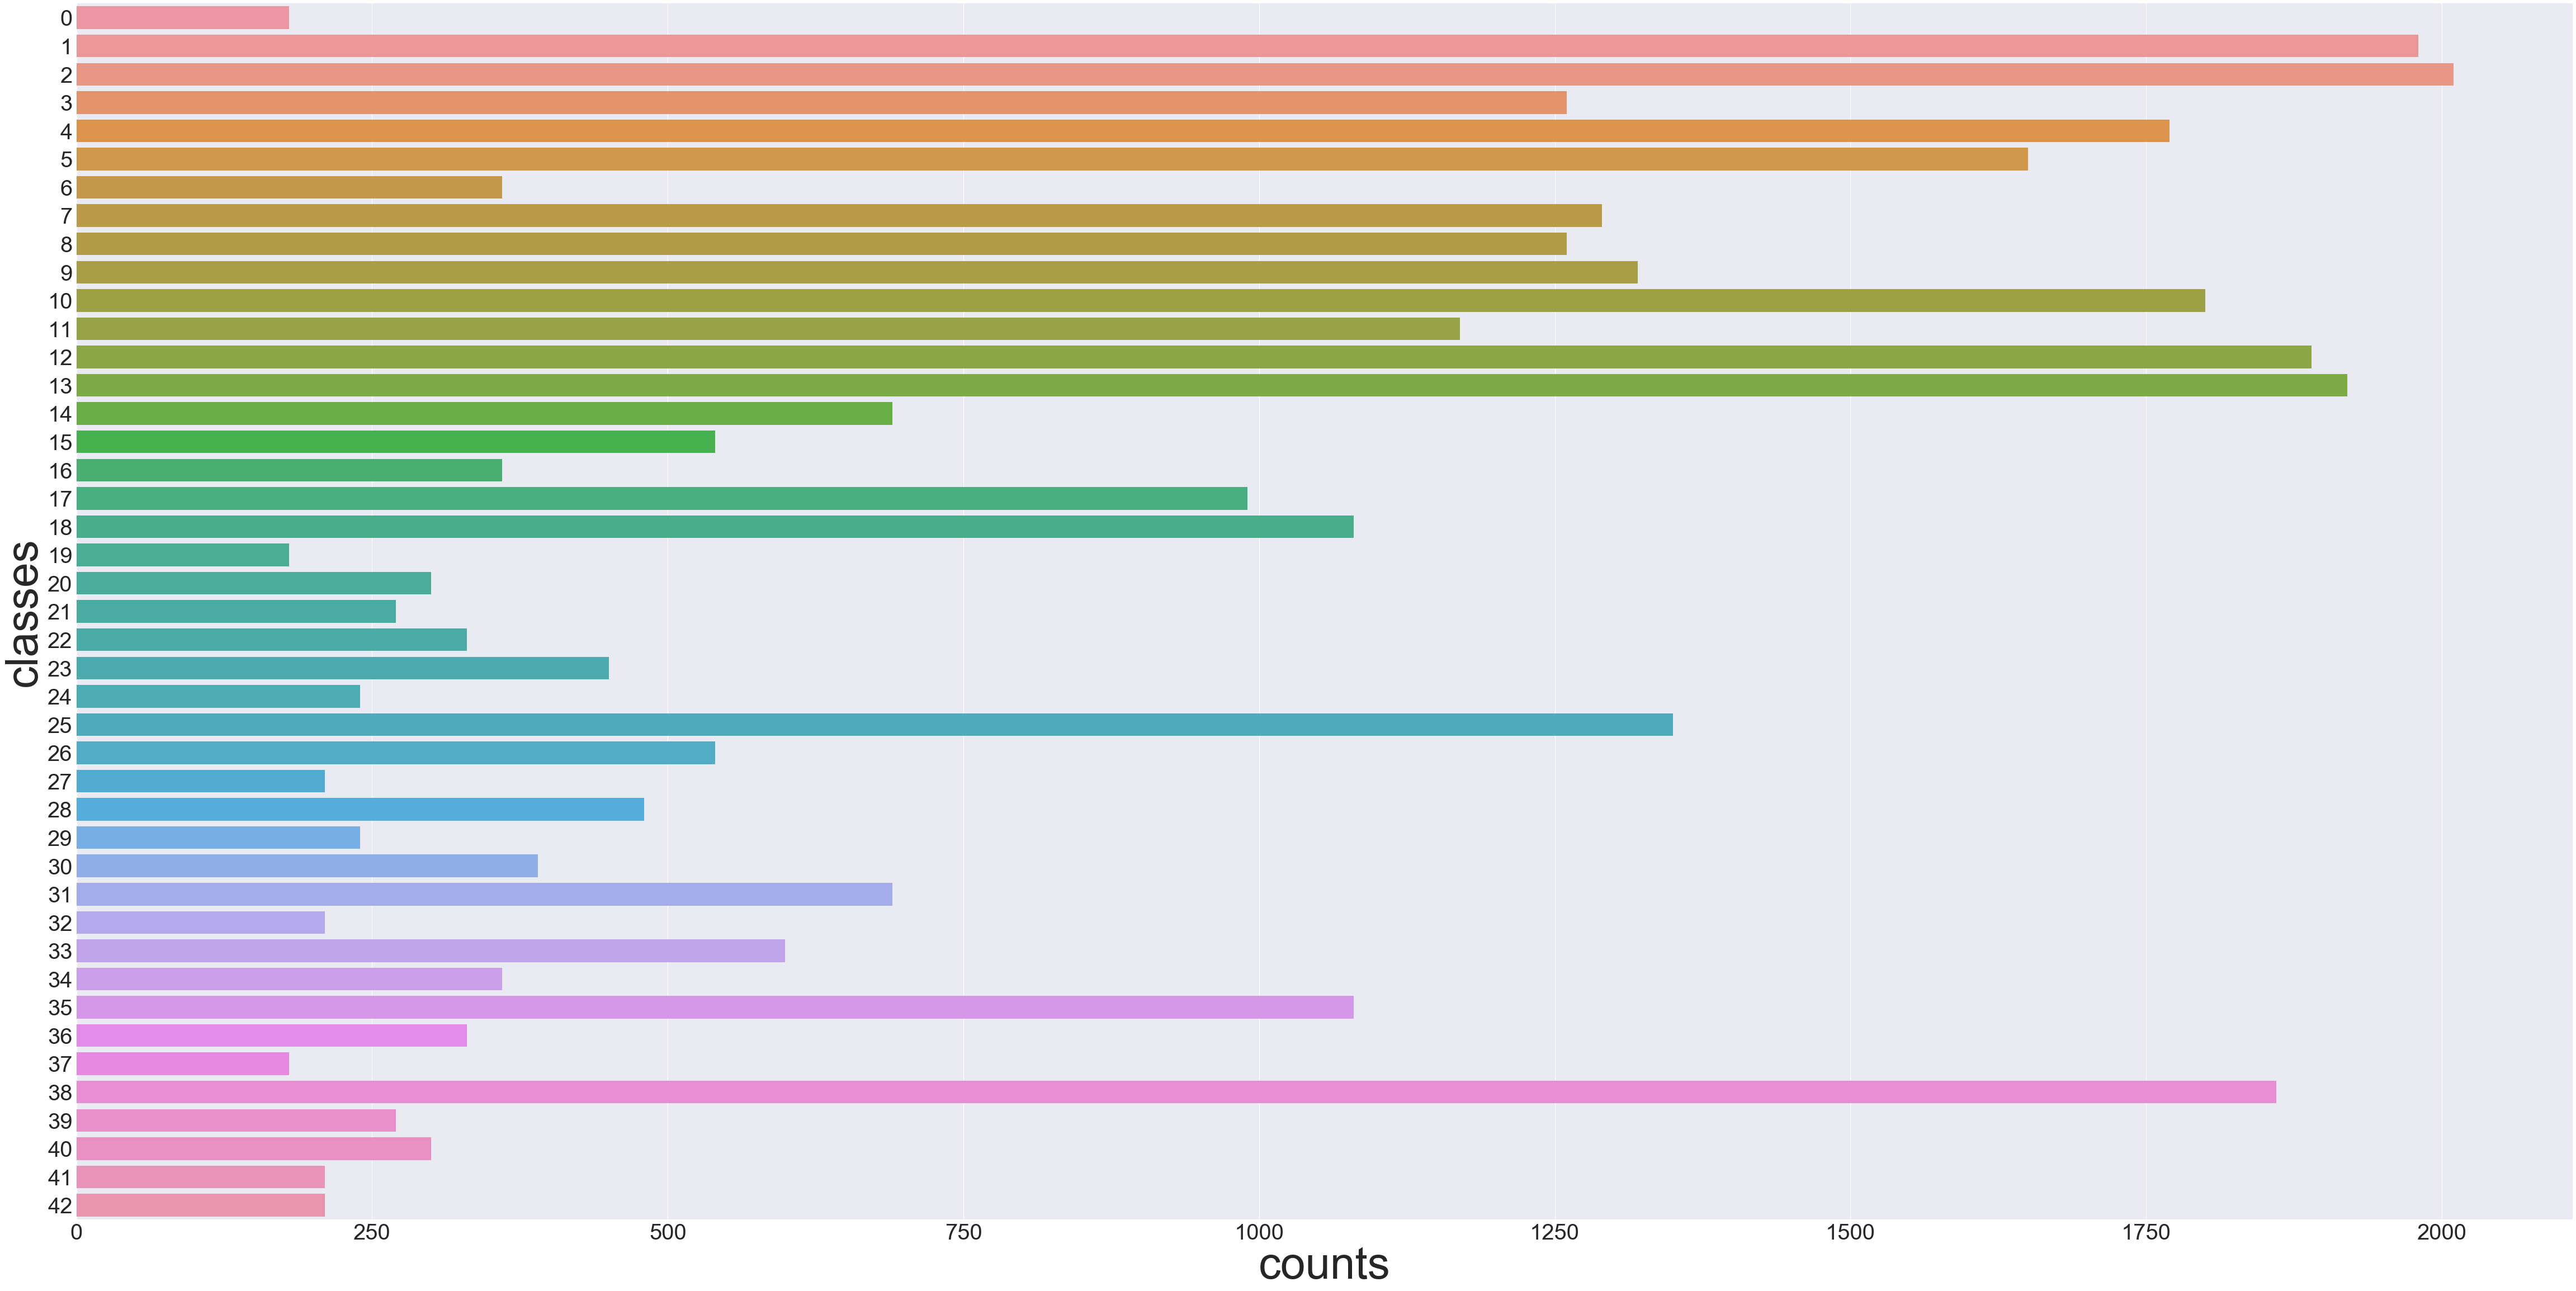

In [6]:
# examine distribution of the dataset
import seaborn as sns
plt.figure(figsize=(80,40))
ax = sns.countplot(y = y_train).tick_params(labelsize=40)
plt.xlabel('counts', size=80)
plt.ylabel('classes', size=80)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
import cv2

# covert images into garyscale
def covt_gray(img):
    return np.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY ), (32,32,1))

# convert images from dataset into grayscale
def imgs_preprocess(x):
    x_processed = []
    for img in x:
        x_processed.append(covt_gray(img))
    return np.array(x_processed)

def preprocess(train, valid, test, normalized=False):
    preprocessed_X_train = imgs_preprocess(train)
    preprocessed_X_valid = imgs_preprocess(valid)
    preprocessed_X_test = imgs_preprocess(test)
    
    if normalized:
        preprocessed_X_train = preprocessed_X_train/255
        preprocessed_X_valid = preprocessed_X_valid/255
        preprocessed_X_test = preprocessed_X_test/255
    
    return preprocessed_X_train, preprocessed_X_valid, preprocessed_X_test

0. Speed limit (20km/h)


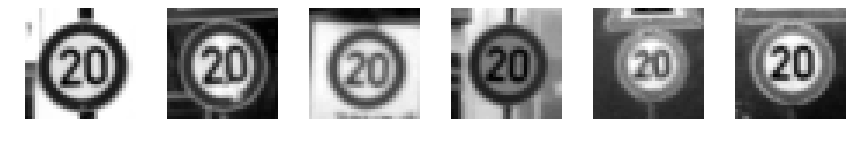

1. Speed limit (30km/h)


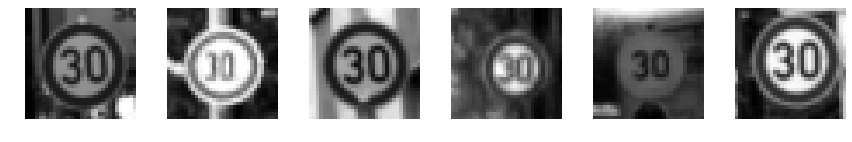

2. Speed limit (50km/h)


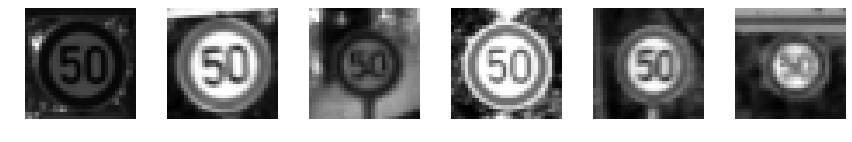

3. Speed limit (60km/h)


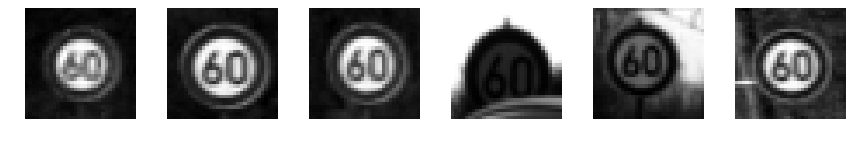

4. Speed limit (70km/h)


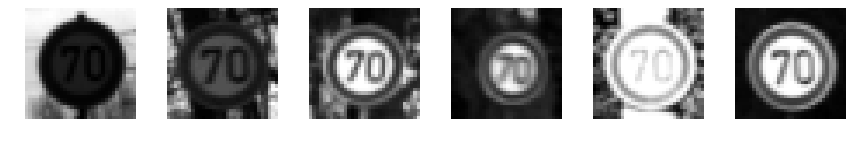

5. Speed limit (80km/h)


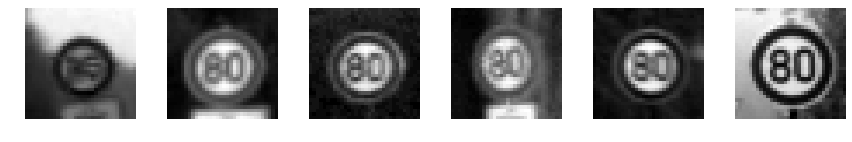

6. End of speed limit (80km/h)


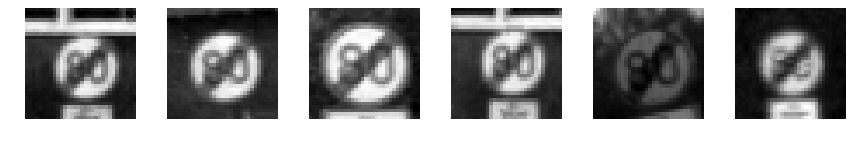

7. Speed limit (100km/h)


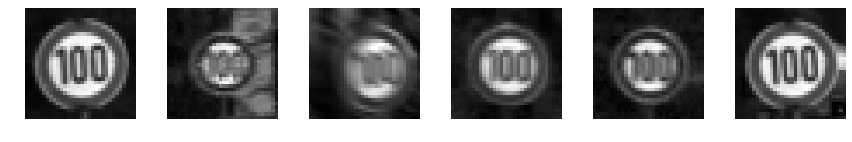

8. Speed limit (120km/h)


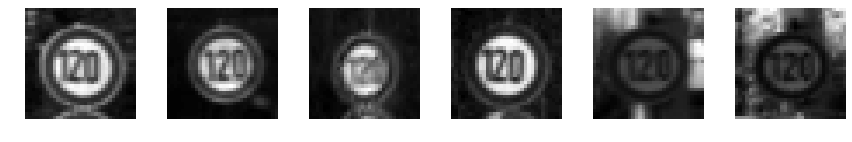

9. No passing


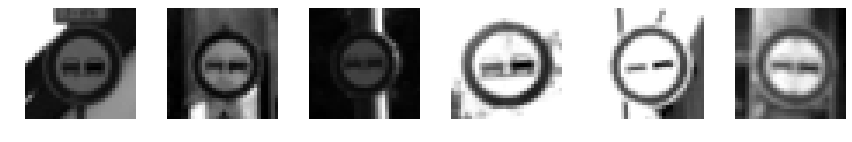

10. No passing for vehicles over 3.5 metric tons


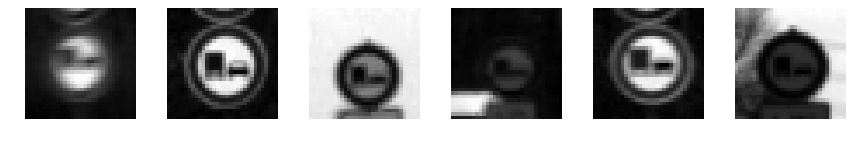

11. Right-of-way at the next intersection


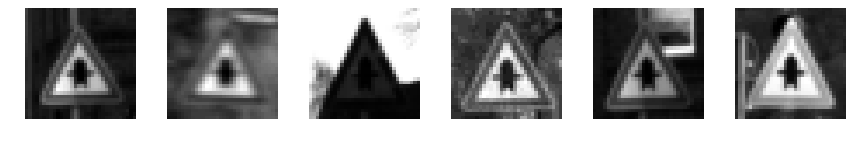

12. Priority road


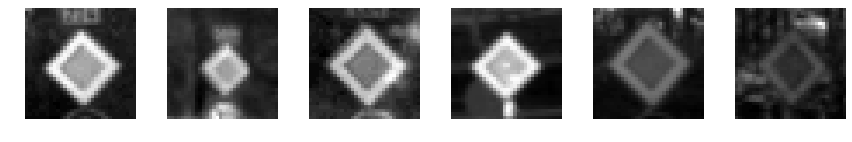

13. Yield


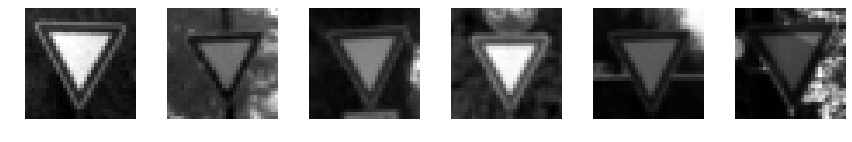

14. Stop


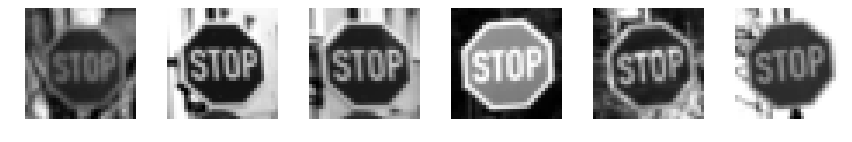

15. No vehicles


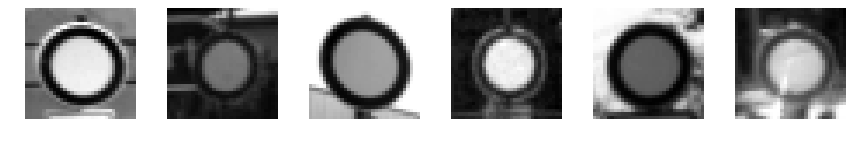

16. Vehicles over 3.5 metric tons prohibited


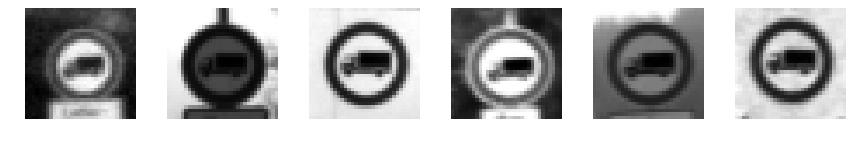

17. No entry


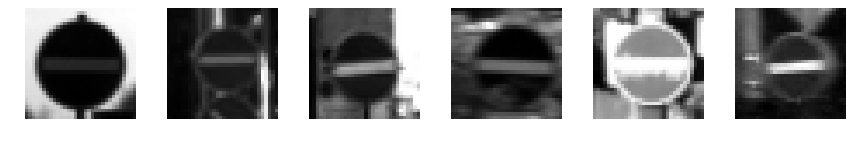

18. General caution


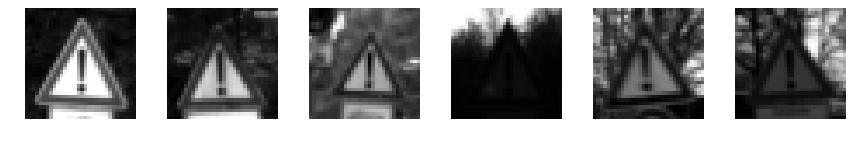

19. Dangerous curve to the left


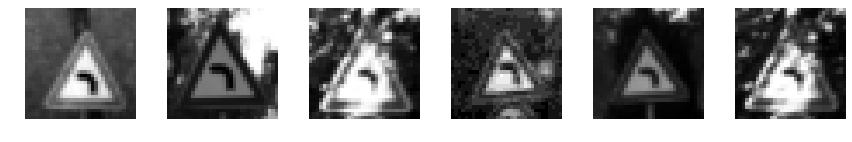

20. Dangerous curve to the right


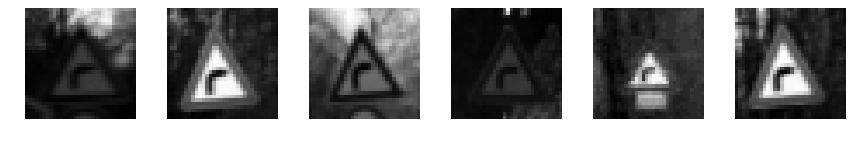

21. Double curve


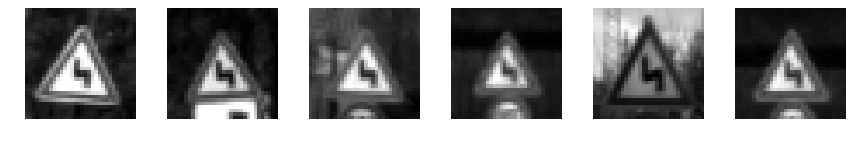

22. Bumpy road


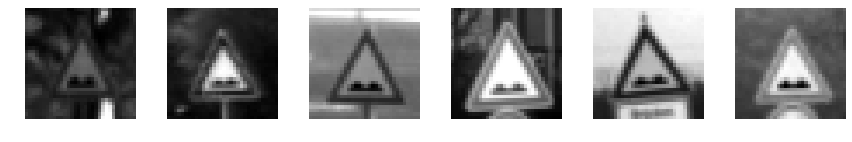

23. Slippery road


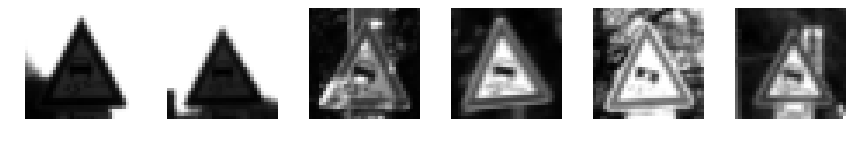

24. Road narrows on the right


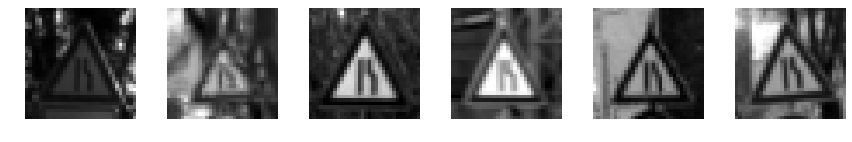

25. Road work


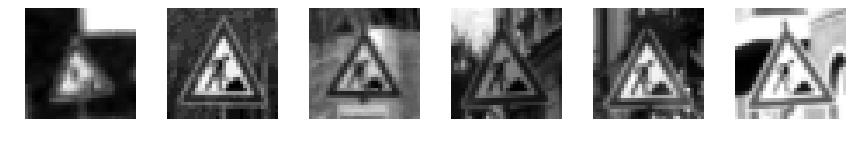

26. Traffic signals


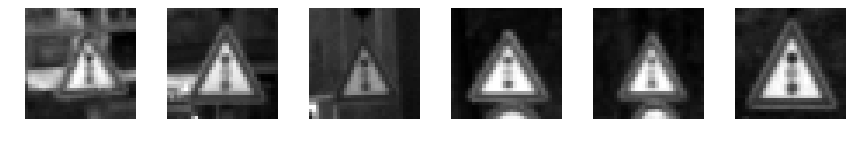

27. Pedestrians


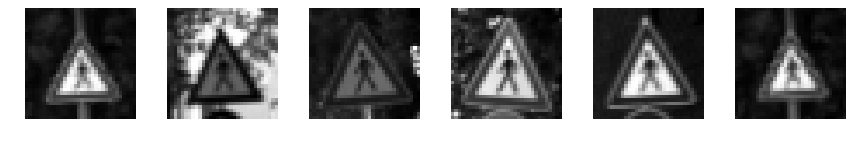

28. Children crossing


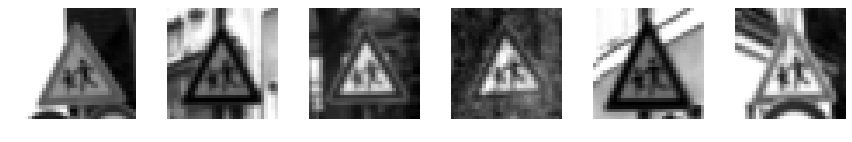

29. Bicycles crossing


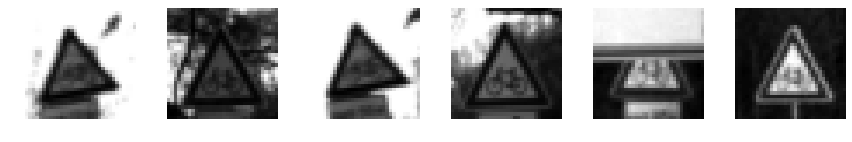

30. Beware of ice/snow


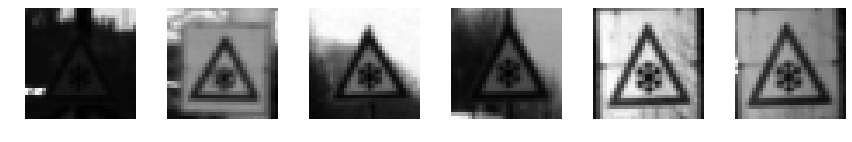

31. Wild animals crossing


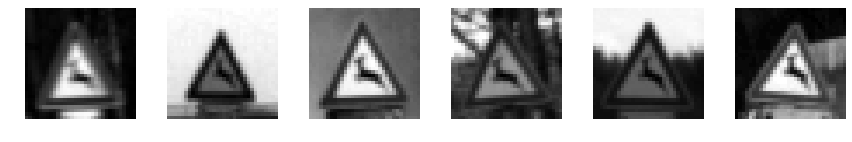

32. End of all speed and passing limits


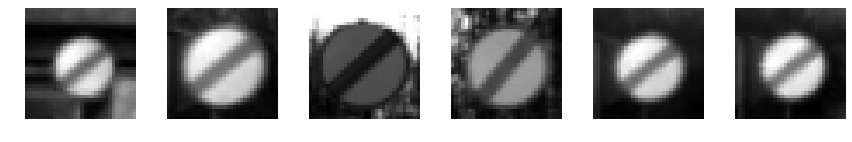

33. Turn right ahead


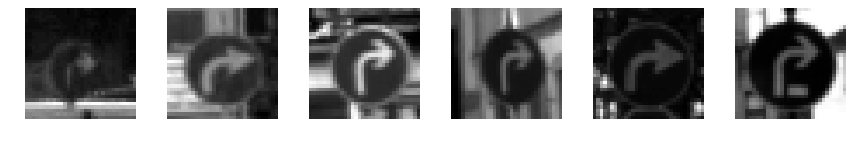

34. Turn left ahead


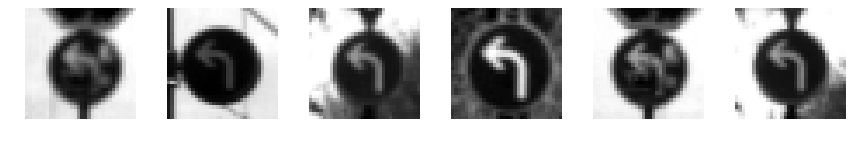

35. Ahead only


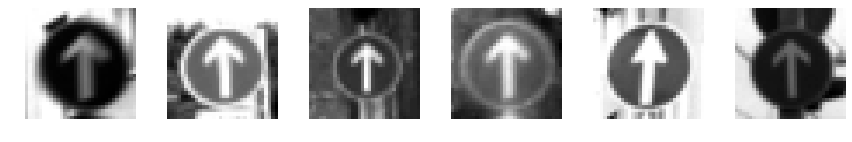

36. Go straight or right


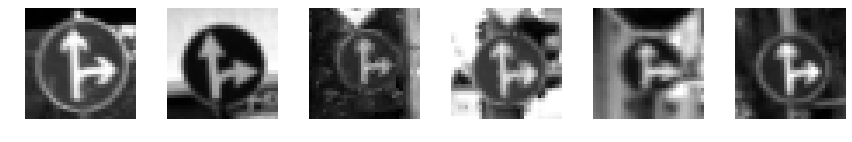

37. Go straight or left


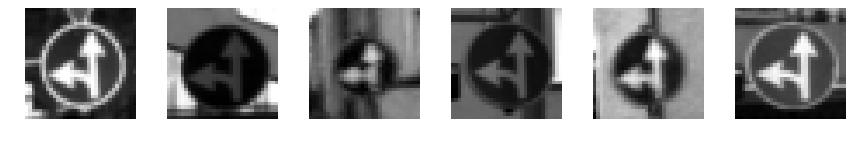

38. Keep right


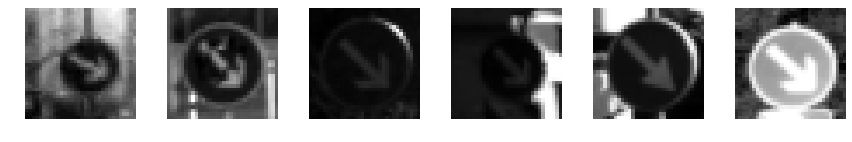

39. Keep left


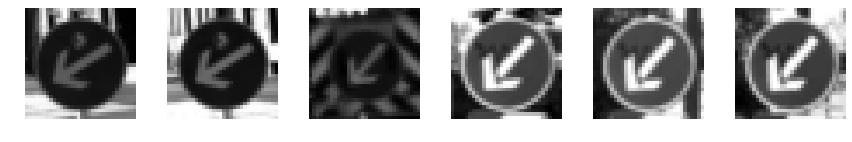

40. Roundabout mandatory


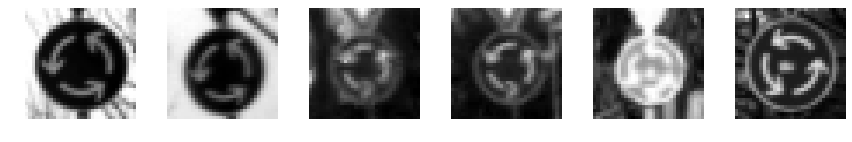

41. End of no passing


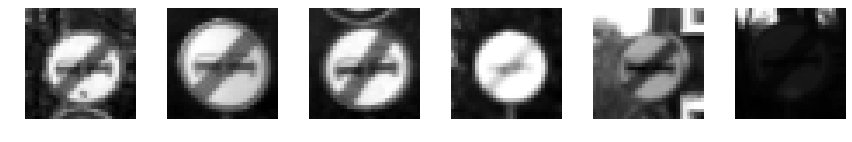

42. End of no passing by vehicles over 3.5 metric tons


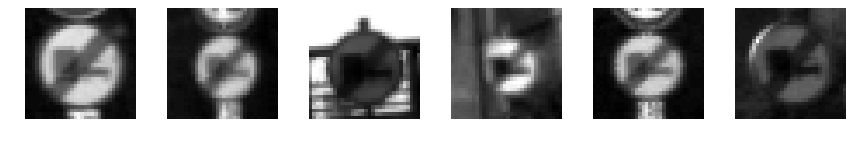

In [9]:
X_train_gray, X_valid_gray, X_test_gray = preprocess(X_train, X_valid, X_test, nor)
plot_data(X_train_gray.reshape((-1,32,32)), y_train, 6)

### Data Augmentation

In [7]:
from scipy import ndimage

def rotate(img):
    deg = random.uniform(-20,20)
    return ndimage.rotate(img, deg, reshape=False)

def data_aug(x, y, num):
    new_x, new_y = [], []
    for img, label in zip(x, y):
        for i in range(num):
            new_x.append(rotate(img))
            new_y.append(label)
    return np.array(new_x), np.array(new_y)

In [11]:
X_train_aug, y_train_aug = data_aug(X_train, y_train, 5)

In [12]:
# save augmented data
np.save('./augmented_data/x_train', X_train_aug)
np.save('./augmented_data/y_train', y_train_aug)

### Model Architecture

In [8]:
def LeNet(x, keep_prob, gray):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Size of input channel
    Input_channel = 1 if gray else 3
    # Output Channel
    output_channel = 43
    
    # Layer 1: Convolutional. Input = 32x32xInput_channel. Output = 28x28x100.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, Input_channel, 100), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(100))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x100. Output = 14x14x100.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional Input = 14x14x100. Output = 10x10x260
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 100, 260), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(260))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x260. Output = 5x5x260.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x260. Output = 6500.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 6500. Output = 2000.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6500, 2000), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 200. Output = 1000.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(2000, 1000), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1000))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 1000. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1000, output_channel), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(output_channel))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [9]:
# loss function
def loss(labels, logits):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    return loss_operation

# train operation
def train_opt(loss_operation, learning_rate=0.001):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    return training_operation

# accuracy operation
def accuracy(logits, labels):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy_operation

# evaluation function
def evaluate(x_data, y_data, x, y, accuracy_operation, bs, keep_prob):
    n = len(x_data)
    total_acc = 0
    sess = tf.get_default_session()
    
    for offset in range(0, n, bs):
        b_x, b_y = x_data[offset:offset+bs], y_data[offset:offset+bs]
        accuracy = sess.run(accuracy_operation, feed_dict={x: b_x, y:b_y, keep_prob:1.0})
        total_acc += (accuracy* len(b_x))
    
    return total_acc / n

def misclassified(logits, labels):
    return logits, labels

def eval_misclassified(x_data, y_data, x, y, misclassified_operation, bs, keep_prob):
    n = len(x_data)
    logits, labels = np.zeros((bs, 43)), np.zeros((bs,43))
    sess = tf.get_default_session()
    for offset in range(0, n, bs):
        b_x, b_y = x_data[offset:offset+bs], y_data[offset:offset+bs]
        b_logits, b_labels = sess.run(misclassified_operation, feed_dict={x:b_x, y:b_y, keep_prob:1.0})       
        logits = np.append(logits,b_logits, 0)
        labels = np.append(labels,b_labels, 0)
        
    return logits, labels

def most_mis(logits, labels):
    logits, labels = np.argmax(logits, 1), np.argmax(labels, 1)
    mislabel = logits != labels
    mis_preds = labels[mislabel]
    classes, counts = np.unique(mis_preds, return_counts=True)
    return classes, counts


In [10]:
# helper function for plotting accuracy vs epochs and distribution of misclassification
def acc_plot(train_acc, val_acc, test_acc):
    plt.plot(train_acc, 'r', lw=1, label="Train")
    plt.plot(val_acc, 'b', lw=1, label="Validation")
    plt.plot(test_acc, 'g', lw=1, label="Test")
    plt.legend(loc='best')
    plt.gca().set_facecolor('white')
    plt.grid(lw=0.5, alpha=0.5, color='black')
    plt.title('Accuracy vs Epochs', size=10)
    plt.xlabel('epochs', size=10)
    plt.ylabel('accuracy', size=10)
    
def mis_plot(classes, counts):
    plt.bar(classes, counts)
    plt.title('Distribution of misclassification', size=10)
    plt.xlabel('classes', size=10)
    plt.ylabel('counts', size=10)
 

In [11]:
# create graphs and run 
def run(arch,dataset, learning_rate=0.001, keep=0.5, EPOCHS=2, BATCH_SIZE=128, verbose=0, saveModel=None):
    
    saver = tf.train.Saver()
    
    # unwrap datasets
    train, val, test = dataset
    X_train, y_train = train
    X_valid, y_valid = val
    X_test, y_test = test
    
    gray = False if X_train.shape[-1] == 3 else True
    
    keep_prob = tf.placeholder(tf.float32)
    x = tf.placeholder(tf.float32, (None, 32, 32, 1)) if gray else tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    
    logits = arch(x, keep_prob, gray) 
    loss_operation = loss(labels=one_hot_y, logits=logits)
    training_operation = train_opt(learning_rate=learning_rate, loss_operation=loss_operation)
    accuracy_operation = accuracy(logits=logits, labels=one_hot_y)
    misclassified_operation = misclassified(logits=logits, labels=one_hot_y)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()

        train_acc, val_acc, test_acc = [], [], []

        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:keep})

            # obtain accuracies 
            train_accuracy = evaluate(X_train, y_train, x, y, accuracy_operation, BATCH_SIZE, keep_prob)    
            validation_accuracy = evaluate(X_valid, y_valid, x, y, accuracy_operation, BATCH_SIZE, keep_prob)
            test_accuracy = evaluate(X_test, y_test, x, y, accuracy_operation, BATCH_SIZE, keep_prob)
            # append accuracies to lists accoridingly
            train_acc.append(train_accuracy)
            val_acc.append(validation_accuracy)
            test_acc.append(test_accuracy)
                      
            if verbose in [1,3]:
                print("EPOCH {} ...".format(i+1))
                print("Train Accuracy = {:.3f}".format(train_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Test Accuracy = {:.3f}".format(test_accuracy))
                print()

        if verbose in [2,3]:
            plt.figure(figsize=(20,10))
            
            # plt accuracy against epochs
            plt.subplot(121)
            acc_plot(train_acc,val_acc,test_acc)
            
            # get predictions and orginal labels
            logits, labels = eval_misclassified(X_test, y_test, x, y, misclassified_operation, BATCH_SIZE, keep_prob)
            classes, counts = most_mis(logits, labels)
            
            # plot dist of misclassification
            plt.subplot(122)
            mis_plot(classes, counts)
        
        print('Accuracy of the model: {:.6f}'.format(test_acc[-1]))
        
        #show misclassifications rates greater than 0.1
        classes_counts = np.unique(y_test, return_counts=True)[1]
        for i,j in zip(classes, counts):
            rate = j/classes_counts[i]
            if rate >= 0.1:
                print('class {} has misclassification rate of {:.3f}'.format(i, rate))
  
        # save model
        if saveModel: 
            saver.save(sess, './models/' + saveModel)
            print('Model saved')
        

In [17]:
X_train_gray_normalized = X_train_gray/255.
X_valid_gray_normalized = X_valid_gray/255.
X_test_gray_normalized = X_test_gray/255.
dataset = [[X_train_gray_normalized, y_train],[X_valid_gray_normalized, y_valid], [X_test_gray_normalized, y_test]]

Training...

EPOCH 1 ...
Train Accuracy = 0.934
Validation Accuracy = 0.850
Test Accuracy = 0.859

EPOCH 2 ...
Train Accuracy = 0.983
Validation Accuracy = 0.929
Test Accuracy = 0.919

EPOCH 3 ...
Train Accuracy = 0.992
Validation Accuracy = 0.950
Test Accuracy = 0.935

EPOCH 4 ...
Train Accuracy = 0.996
Validation Accuracy = 0.952
Test Accuracy = 0.939

EPOCH 5 ...
Train Accuracy = 0.995
Validation Accuracy = 0.954
Test Accuracy = 0.940

EPOCH 6 ...
Train Accuracy = 0.997
Validation Accuracy = 0.956
Test Accuracy = 0.943

EPOCH 7 ...
Train Accuracy = 0.995
Validation Accuracy = 0.943
Test Accuracy = 0.941

EPOCH 8 ...
Train Accuracy = 0.998
Validation Accuracy = 0.963
Test Accuracy = 0.948

EPOCH 9 ...
Train Accuracy = 0.998
Validation Accuracy = 0.959
Test Accuracy = 0.943

EPOCH 10 ...
Train Accuracy = 0.998
Validation Accuracy = 0.953
Test Accuracy = 0.940

Accuracy of the model: 0.940459
class 6 has misclassification rate of 0.167
class 18 has misclassification rate of 0.156
class

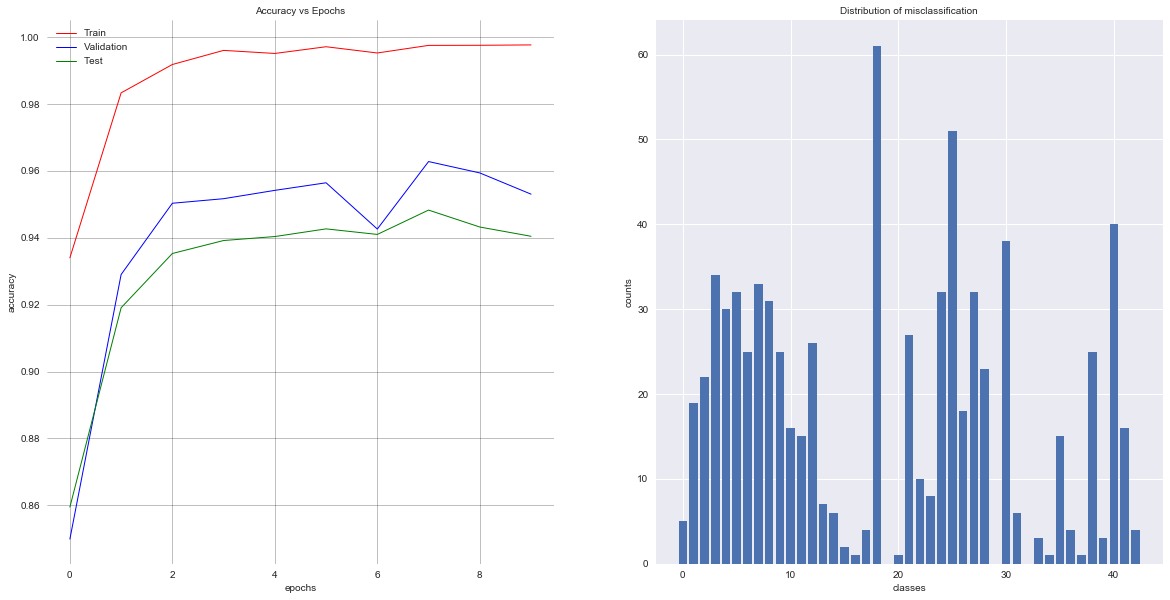

In [20]:
run(arch=LeNet, dataset=dataset, learning_rate= 0.001, EPOCHS=10, BATCH_SIZE=64, verbose=3, keep=0.5)

In [25]:
X_train_aug_gray, X_valid_gray, X_test_gray = preprocess(X_train_aug, X_valid, X_test, normalized=True)
aug_dataset = [[X_train_aug_gray, y_train_aug],[X_valid_gray, y_valid], [X_test_gray, y_test]]

Training...

EPOCH 1 ...
Train Accuracy = 0.146
Validation Accuracy = 0.141
Test Accuracy = 0.152

EPOCH 2 ...
Train Accuracy = 0.225
Validation Accuracy = 0.211
Test Accuracy = 0.221

EPOCH 3 ...
Train Accuracy = 0.292
Validation Accuracy = 0.253
Test Accuracy = 0.279

EPOCH 4 ...
Train Accuracy = 0.367
Validation Accuracy = 0.322
Test Accuracy = 0.352

EPOCH 5 ...
Train Accuracy = 0.398
Validation Accuracy = 0.361
Test Accuracy = 0.389

EPOCH 6 ...
Train Accuracy = 0.463
Validation Accuracy = 0.415
Test Accuracy = 0.438

EPOCH 7 ...
Train Accuracy = 0.510
Validation Accuracy = 0.454
Test Accuracy = 0.478

EPOCH 8 ...
Train Accuracy = 0.616
Validation Accuracy = 0.580
Test Accuracy = 0.596

EPOCH 9 ...
Train Accuracy = 0.689
Validation Accuracy = 0.644
Test Accuracy = 0.656

EPOCH 10 ...
Train Accuracy = 0.765
Validation Accuracy = 0.720
Test Accuracy = 0.715

EPOCH 11 ...
Train Accuracy = 0.823
Validation Accuracy = 0.763
Test Accuracy = 0.771

EPOCH 12 ...
Train Accuracy = 0.873
Val

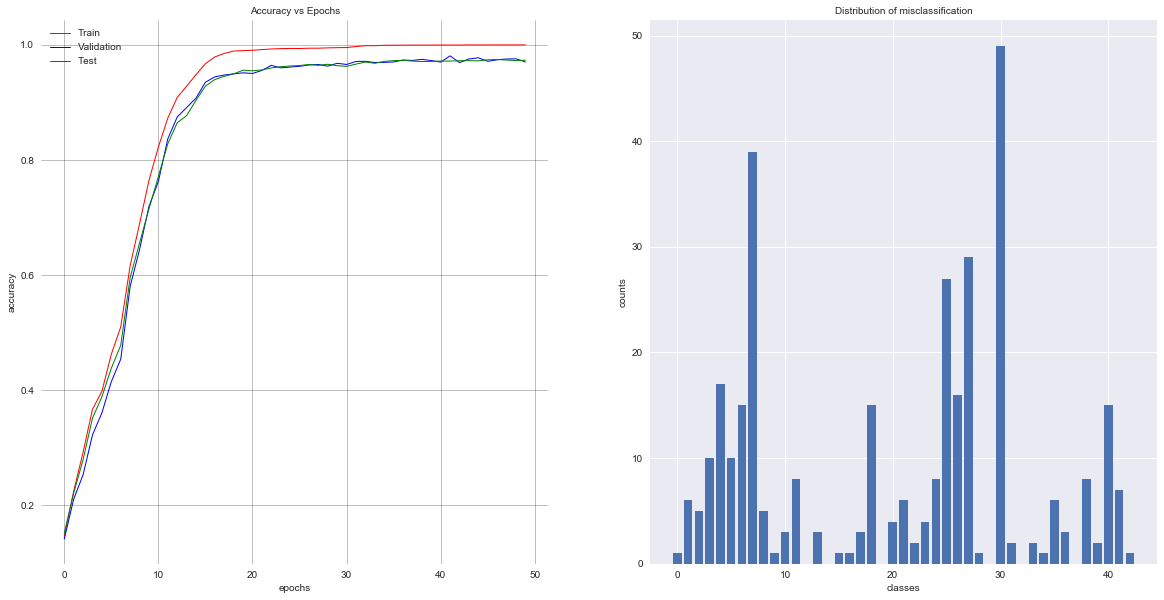

In [26]:
run(arch=LeNet, dataset=aug_dataset, learning_rate= 0.0001, EPOCHS=50, BATCH_SIZE=128, verbose=3, keep=0.2, saveModel='LeNet_with_augmentaion')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


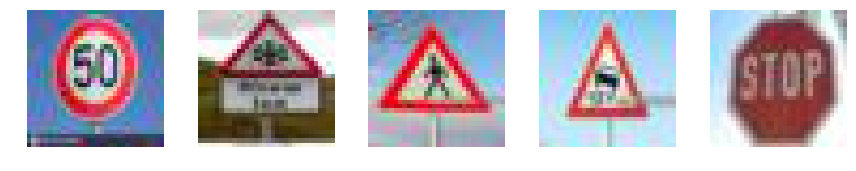

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from scipy import misc

dir = './new test images/'
new_test = []
# using images from the most incorrectly labeled classes
new_label = np.array([2, 30, 27, 23, 14])
for f in os.listdir(dir):
    img = misc.imread(dir+f)
    new_test.append(img)

plots(new_test)

### Predict the Sign Type for Each Image

In [16]:
new_test = np.array(new_test)
# change images into grayscale
new_test_gray = imgs_preprocess(new_test) / 255

In [121]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# feed in the pipeline
learning_rate = 0.0001
bs=128
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) 
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
logits = LeNet(x, keep_prob, True) 
loss_operation = loss(labels=one_hot_y, logits=logits)
training_operation = train_opt(learning_rate=learning_rate, loss_operation=loss_operation)
accuracy_operation = accuracy(logits=logits, labels=one_hot_y)
misclassified_operation = misclassified(logits=logits, labels=one_hot_y)

logits, label = 0, 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./models/LeNet_with_augmentaion.meta')
    saver.restore(sess, "./models/LeNet_with_augmentaion")
    logits, labels = eval_misclassified(new_test_gray, new_label, x, y, misclassified_operation, bs, keep_prob)
    print('predictions:',np.argmax(logits, 1)[-5:], 'true label:', np.argmax(labels,1)[-5:])
    my_accuracy = evaluate(new_test_gray, new_label, x,y, accuracy_operation, bs, keep_prob)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./models/LeNet_with_augmentaion
predictions: [42 33 31 33 37] true label: [ 2 30 27 23 14]
Test Set Accuracy = 0.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [114]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def softmax(x):
    dem = np.sum(np.exp(x))
    return np.exp(x)/dem

def softmax_logits(x):
    results = []
    for i in range(len(x)):
        results.append(softmax(x[i]))
    return np.array(results)

def top_k(x, k):
    results = []
    indices = np.argsort(x, 1)
    for i in range(len(indices)):
        results.append(indices[i][-k:][::-1])
    return results

def show_prob(probs, k):
    results = []
    for i in k:
        results.append(probs[i])
    return results

In [124]:
logits = logits[-5:]
probs = softmax_logits(logits)
k = top_k(probs, 5)
for i in range(5):
    print('Image {} top 5 predictions are {}, with respective probabilies {}'.format(i+1, k[i], show_prob(probs[i], k[i])))

Image 1 top 5 predictions are [42 37 33 31 21], with respective probabilies [0.9571274869711012, 0.031039363145490988, 0.011723023173393491, 6.42336158569449e-05, 4.42497550467928e-05]
Image 2 top 5 predictions are [33 42 31 22 36], with respective probabilies [0.9999999935731553, 3.0840591494107425e-09, 2.7405924651892623e-09, 3.653569063433389e-10, 1.9482467634659236e-10]
Image 3 top 5 predictions are [31 33 36 42 37], with respective probabilies [0.999763551103067, 0.00021947452087496834, 1.5825827419431292e-05, 6.596981697440647e-07, 4.046445655707524e-07]
Image 4 top 5 predictions are [33 31 36 37 42], with respective probabilies [0.6863656776778675, 0.2987537392448711, 0.014878328956127153, 2.2508944887216253e-06, 3.0154165068144186e-09]
Image 5 top 5 predictions are [37 31 22 36 33], with respective probabilies [0.989325716507278, 0.010645533099511132, 2.2791429769548226e-05, 4.55717308992662e-06, 6.565868967332775e-07]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")